In [1]:
import workflow as wf
import pandas as pd
import numpy as np
import tensorflow as tf

Using TensorFlow backend.


In [143]:
import importlib
importlib.reload(wf)

<module 'workflow' from 'C:\\Users\\Ceiec02\\OneDrive\\Universidad\\CEIEC\\PFG\\aneurismas\\Métodos\\workflow\\workflow.py'>

In [117]:
tf.keras.backend.clear_session()

In [ ]:
path = "REGISTRO  FERNANDO PARA IA.xls"

In [2]:
datos_raw = wf.load_and_clean(path)

In [16]:
datos_chi = wf.chi_squared_test(datos_raw, 'EXITUS30D')

In [17]:
datos_imputed = wf.most_frequent_and_knn_imputation(datos_chi)

In [18]:
data_std = wf.standard_scaler(datos_imputed)

In [19]:
data_encoded = wf.ordinal_encoding(data_std)

In [20]:
data_balanced = wf.smote_edited_nearest_neighbor(data_encoded, 'EXITUS30D')

In [21]:
data_balanced_dropped = data_balanced.drop(columns = ['EXITUS30D'])

In [22]:
x_train, x_test, y_train, y_test, network_output = wf.prep_datos_red('EXITUS30D' , data_balanced, data_balanced_dropped)

(511, 29) (128, 29)
(511, 1) (128, 1)


In [ ]:
best_params = wf.grid_search_mlp(x_train, y_train, x_test, y_test)

In [24]:
best_params

{'batch_size': 16, 'dropout_rate': 0.15, 'epochs': 100, 'neurons': 12}

In [25]:
tf.compat.v1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [118]:
best_model = wf.create_model(shape=x_train.shape[1], dropout_rate=best_params['dropout_rate'], neurons=best_params['neurons'])

Train on 408 samples, validate on 103 samples
Epoch 1/100
408/408 - 0s - loss: 0.6955 - acc: 0.5637 - val_loss: 0.6251 - val_acc: 0.6699
Epoch 2/100
408/408 - 0s - loss: 0.6365 - acc: 0.6250 - val_loss: 0.5996 - val_acc: 0.6505
Epoch 3/100
408/408 - 0s - loss: 0.6073 - acc: 0.6765 - val_loss: 0.5692 - val_acc: 0.7087
Epoch 4/100
408/408 - 0s - loss: 0.5799 - acc: 0.6691 - val_loss: 0.5538 - val_acc: 0.6699
Epoch 5/100
408/408 - 0s - loss: 0.5657 - acc: 0.6936 - val_loss: 0.5336 - val_acc: 0.7184
Epoch 6/100
408/408 - 0s - loss: 0.5513 - acc: 0.7034 - val_loss: 0.5146 - val_acc: 0.7282
Epoch 7/100
408/408 - 0s - loss: 0.5462 - acc: 0.7181 - val_loss: 0.5000 - val_acc: 0.7573
Epoch 8/100
408/408 - 0s - loss: 0.5068 - acc: 0.7426 - val_loss: 0.4782 - val_acc: 0.7670
Epoch 9/100
408/408 - 0s - loss: 0.4821 - acc: 0.7745 - val_loss: 0.4559 - val_acc: 0.7767
Epoch 10/100
408/408 - 0s - loss: 0.4714 - acc: 0.7696 - val_loss: 0.4329 - val_acc: 0.7961
Epoch 11/100
408/408 - 0s - loss: 0.4717 - 

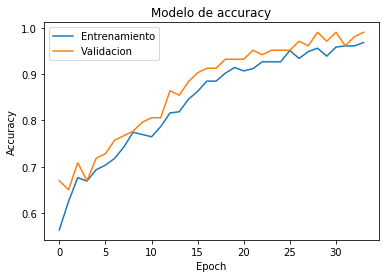

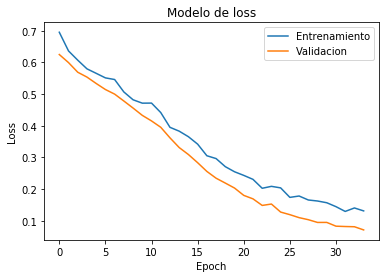

In [119]:
best_model_train = wf.train_model(best_model, best_params, x_train, y_train)



Classification Report

              precision    recall  f1-score   support

           0    0.95775   0.98551   0.97143        69
           1    0.98246   0.94915   0.96552        59

    accuracy                        0.96875       128
   macro avg    0.97010   0.96733   0.96847       128
weighted avg    0.96914   0.96875   0.96870       128



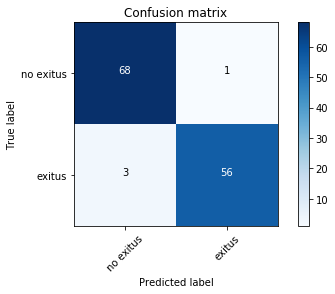

In [120]:
predicts = wf.predict_model_and_report(best_model_train, x_test, y_test, ['no exitus', 'exitus'])

#### Shap Kernel Explainer

In [121]:
kernel_explainer, kernel_values, x_train_df = wf.shap_kernel_explainer(data_balanced_dropped, x_train, x_test, best_model_train)

Using 511 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [122]:
wf.shap_prediction_force_plot(kernel_explainer, kernel_values, x_train_df)

In [123]:
wf.shap_complete_force_plot(kernel_explainer, kernel_values, x_train_df)

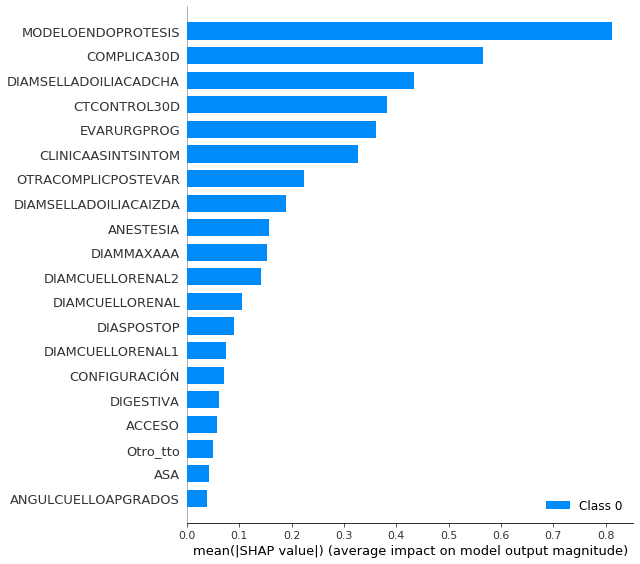

In [124]:
wf.shap_summary_plot(kernel_values, x_train_df)

In [125]:
kernel_features, kernel_features_drop = wf.features_df(data_balanced, kernel_values, 5, 'EXITUS30D')

In [126]:
x_train_kf, x_test_kf, y_train_kf, y_test_kf, network_output_kf = wf.prep_datos_red('EXITUS30D' , kernel_features, kernel_features_drop)

(511, 5) (128, 5)
(511, 1) (128, 1)


In [127]:
best_model_kf = wf.create_model(shape=x_train_kf.shape[1], dropout_rate=best_params['dropout_rate'], neurons=best_params['neurons'])

Train on 408 samples, validate on 103 samples
Epoch 1/100
408/408 - 0s - loss: 0.7827 - acc: 0.5196 - val_loss: 0.6895 - val_acc: 0.5825
Epoch 2/100
408/408 - 0s - loss: 0.7046 - acc: 0.5196 - val_loss: 0.6549 - val_acc: 0.5825
Epoch 3/100
408/408 - 0s - loss: 0.6788 - acc: 0.5417 - val_loss: 0.6384 - val_acc: 0.6117
Epoch 4/100
408/408 - 0s - loss: 0.6577 - acc: 0.5637 - val_loss: 0.6262 - val_acc: 0.6505
Epoch 5/100
408/408 - 0s - loss: 0.6480 - acc: 0.6005 - val_loss: 0.6098 - val_acc: 0.6602
Epoch 6/100
408/408 - 0s - loss: 0.6071 - acc: 0.6642 - val_loss: 0.5888 - val_acc: 0.7184
Epoch 7/100
408/408 - 0s - loss: 0.5815 - acc: 0.7059 - val_loss: 0.5538 - val_acc: 0.7670
Epoch 8/100
408/408 - 0s - loss: 0.5551 - acc: 0.7426 - val_loss: 0.5247 - val_acc: 0.8058
Epoch 9/100
408/408 - 0s - loss: 0.5500 - acc: 0.7010 - val_loss: 0.4962 - val_acc: 0.7864
Epoch 10/100
408/408 - 0s - loss: 0.4917 - acc: 0.7745 - val_loss: 0.4543 - val_acc: 0.8350
Epoch 11/100
408/408 - 0s - loss: 0.4837 - 

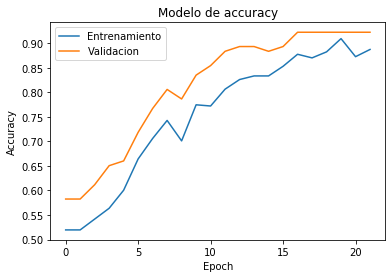

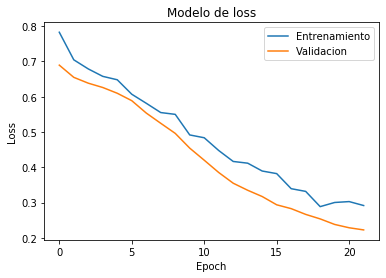

In [128]:
best_model_train_kf = wf.train_model(best_model_kf, best_params, x_train_kf, y_train_kf)



Classification Report

              precision    recall  f1-score   support

           0    0.88571   0.89855   0.89209        69
           1    0.87931   0.86441   0.87179        59

    accuracy                        0.88281       128
   macro avg    0.88251   0.88148   0.88194       128
weighted avg    0.88276   0.88281   0.88273       128



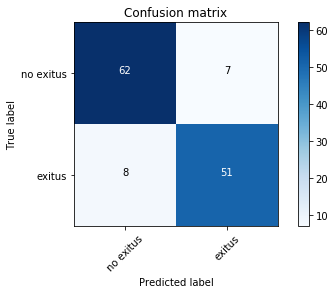

In [129]:
predicts_kf = wf.predict_model_and_report(best_model_train_kf, x_test_kf, y_test_kf, ['no exitus', 'exitus'])

#### Shap Deep Explainer

In [130]:
deep_explainer, deep_values, x_train_df = wf.shap_deep_explainer(data_balanced_dropped, x_train, x_test, best_model_train)

In [131]:
wf.shap_prediction_force_plot(deep_explainer, deep_values, x_train_df)

In [132]:
wf.shap_complete_force_plot(deep_explainer, deep_values, x_train_df)

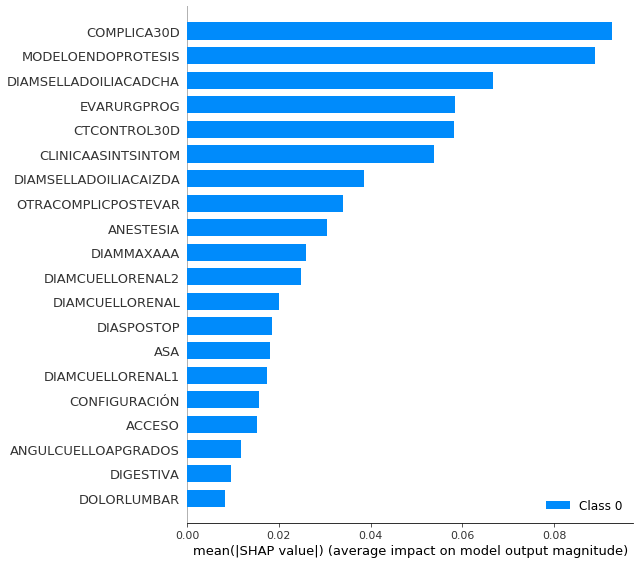

In [133]:
wf.shap_summary_plot(deep_values, x_train_df)

In [134]:
deep_features, deep_features_drop = wf.features_df(data_balanced, kernel_values, 5, 'EXITUS30D')

In [135]:
x_train_df, x_test_df, y_train_df, y_test_df, network_output_df = wf.prep_datos_red('EXITUS30D', deep_features, deep_features_drop)

(511, 5) (128, 5)
(511, 1) (128, 1)


In [136]:
best_model_df = wf.create_model(shape=x_train_df.shape[1], dropout_rate=best_params['dropout_rate'], neurons=best_params['neurons'])

Train on 408 samples, validate on 103 samples
Epoch 1/100
408/408 - 0s - loss: 1.1071 - acc: 0.5294 - val_loss: 0.8756 - val_acc: 0.6214
Epoch 2/100
408/408 - 0s - loss: 0.8245 - acc: 0.5784 - val_loss: 0.7084 - val_acc: 0.6893
Epoch 3/100
408/408 - 0s - loss: 0.7115 - acc: 0.6152 - val_loss: 0.6318 - val_acc: 0.6990
Epoch 4/100
408/408 - 0s - loss: 0.6656 - acc: 0.6225 - val_loss: 0.6108 - val_acc: 0.6505
Epoch 5/100
408/408 - 0s - loss: 0.6340 - acc: 0.6373 - val_loss: 0.5966 - val_acc: 0.6408
Epoch 6/100
408/408 - 0s - loss: 0.6308 - acc: 0.6225 - val_loss: 0.5834 - val_acc: 0.6505
Epoch 7/100
408/408 - 0s - loss: 0.6181 - acc: 0.6520 - val_loss: 0.5738 - val_acc: 0.6893
Epoch 8/100
408/408 - 0s - loss: 0.5986 - acc: 0.6569 - val_loss: 0.5605 - val_acc: 0.7087
Epoch 9/100
408/408 - 0s - loss: 0.5739 - acc: 0.6961 - val_loss: 0.5449 - val_acc: 0.7282
Epoch 10/100
408/408 - 0s - loss: 0.5535 - acc: 0.7157 - val_loss: 0.5264 - val_acc: 0.7573
Epoch 11/100
408/408 - 0s - loss: 0.5568 - 

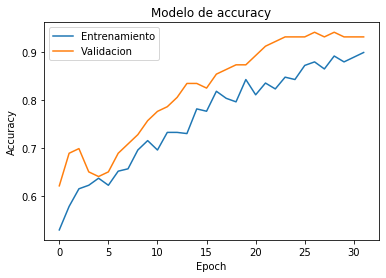

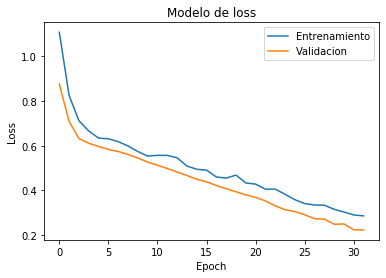

In [137]:
best_model_train_df = wf.train_model(best_model_df, best_params, x_train_df, y_train_df)



Classification Report

              precision    recall  f1-score   support

           0    0.90909   0.86957   0.88889        69
           1    0.85484   0.89831   0.87603        59

    accuracy                        0.88281       128
   macro avg    0.88196   0.88394   0.88246       128
weighted avg    0.88408   0.88281   0.88296       128



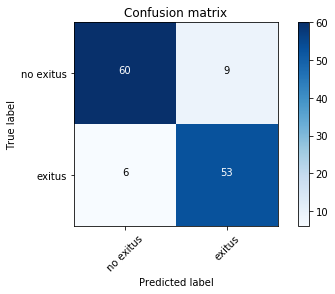

In [138]:
predicts_df = wf.predict_model_and_report(best_model_train_df, x_test_df, y_test_df, ['no exitus', 'exitus'])